LABORATORIO 2 - Procesamiento digital de señales
Hineill David Céspedes Espinoza
20213704

Implementar y dibujar las siguientes se˜nales de prueba. Considerar un l´ımite de
-100 a 100 para el eje X en sus gr´aficos.
x1[n] = cos( π
40n), n ∈ [−200, 199]
x2[n] = cos( π
50n), n ∈ [−200, 199]
Usando estas 2 se˜nales valide experimentalmente la linearidad y la propiedad de
invarianza en el tiempo para los siguientes sistemas. Teniendo en cuenta que para el
an´alisis de linearidad deber´a usar a1=a2=1 como pesos para las se˜nales de entrada y
un retardo en el tiempo k=20 para el an´alisis de la invarianza en el tiempo. Deber´a
implementar el c´odigo requerido para probar y mostrar gr´aficamente este an´alisis.

Sistema 1 (Tarea as´ıncrona) :
y[n] = T1{x[n]} = x[n+10]+x[n−10]
2
Sistema 2 (1pto.):
y[n] = T2{x[n]} = n.x[n]
Sistema 3 (1pto.):
y[n] = T3{x[n]} = n.x2[n]

PRIMER SISTEMA

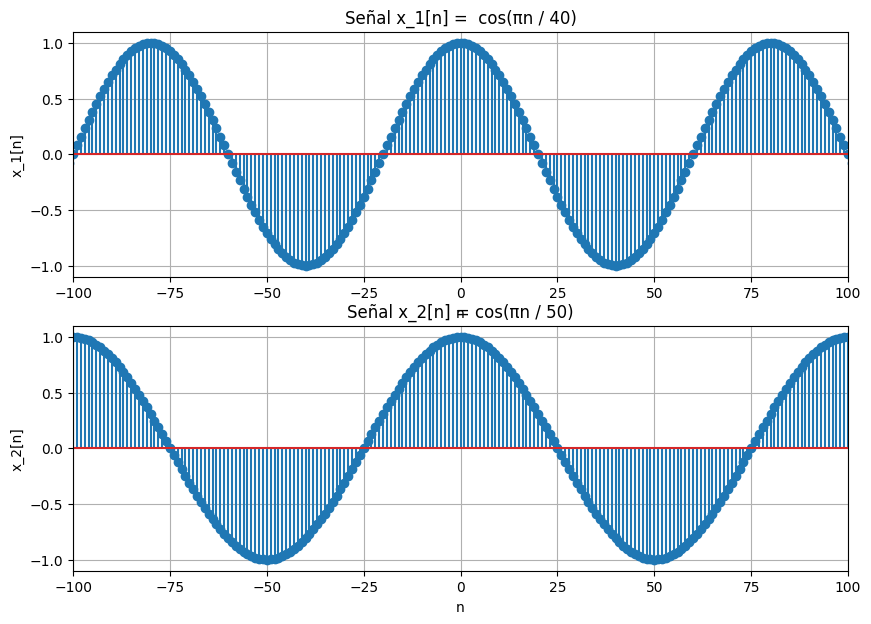

In [193]:
#Para el primer Sistema
#Importamos las librerias
import numpy as np
import matplotlib.pyplot as plt

#Primero generamos las señales solicitadas y las gráficamos
n = np.arange(-200,200)
x_1 = np.cos((np.pi/40) * (n) ) #LAS USAREMOS DE PRUEBA EN PREGUNTA 2
x_2 = np.cos( (np.pi/50 ) * n)
indices= n
plt.figure(figsize=(10, 7))

# Gráfico para x_1
plt.subplot(2, 1, 1)
plt.stem(n, x_1)
plt.title('Señal x_1[n] =  cos(πn / 40)')
plt.xlim([-100,100])
plt.xlabel('n')
plt.ylabel('x_1[n]')
plt.grid(True)

# Gráfico para x_2
plt.subplot(2, 1, 2) 
plt.stem(n, x_2)
plt.title('Señal x_2[n] = cos(πn / 50)')
plt.xlabel('n')
plt.xlim([-100,100])
plt.ylabel('x_2[n]')
plt.grid(True)
plt.show()


In [194]:
#Definimos parámetros para probar la linealidad del sistema 
a2 = 1
a1 = 1
k = 20 #Delay

SEGUNDO SISTEMA

In [195]:
#Para el segundo Sistema
def sistema2(input, indices):
    salida = []
    for i   in np.arange(len(indices)):
        salida.append(indices[i] * input[i])
    return np.asarray(salida)

DEMOSTRACIÓN LINEALIDAD SEGUNDO SISTEMA

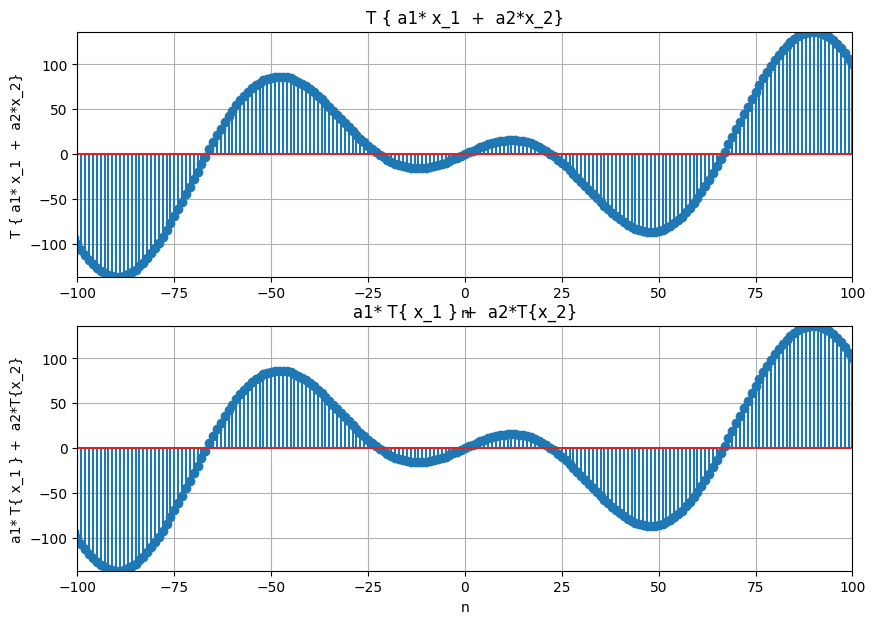

error promedio caso lineal : 1.5558443801180595e-13


In [196]:
#Demostramos linealidad
#dado un T { a1* x_1  +  a2*x_2} = a1* T{x_1} +  a2*T{x_2}
term_1 =  sistema2(a1*x_1 + a2*x_2 , indices)
term_2 =  a1 * sistema2(x_1, indices) +a2 * sistema2(x_2 , indices)
plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)
plt.stem(indices, term_1)
plt.title('T { a1* x_1  +  a2*x_2}')
plt.xlim([-100,100])
plt.ylim([np.min(term_1),np.max(term_1)])
plt.xlabel('n')
plt.ylabel('T { a1* x_1  +  a2*x_2}')
plt.grid(True)

plt.subplot(2, 1, 2) 
plt.stem(indices, term_2)
plt.title('a1* T{ x_1 } +  a2*T{x_2}')
plt.ylim([np.min(term_2),np.max(term_2)])
plt.xlabel('n')
plt.xlim([-100,100])
plt.ylabel('a1* T{ x_1 } +  a2*T{x_2}')
plt.grid(True)
plt.show()
print(f"error promedio caso lineal : {np.linalg.norm(term_1-term_2)}")

Como la diferencia entre ambas gráficas es extremadamente bajo , podemos afirmar que el valor sistema sí es lineal  además por la forma del mismo sistema podemos concluir que es lineal , ya que solo se realizan operaciones aritmeticas básicas con las entradas de los sistemas. (no hay operaciones trigonometricas ni polinomicas aplicadas a las entradas por lo que el sistema puede considerarse lineal apriori)

DEMOSTRACIÓN INVARIANZA SEGUNDO SISTEMA

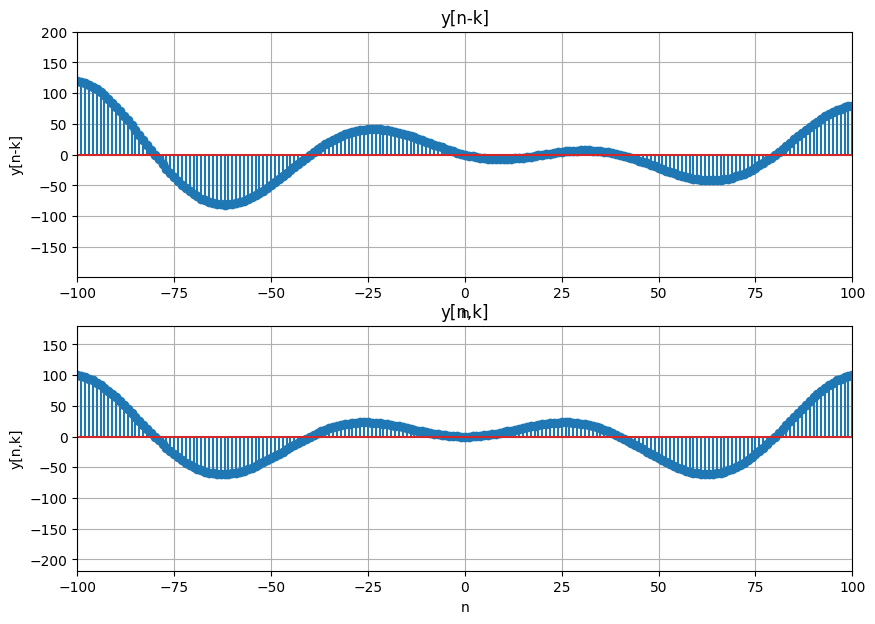

error promedio caso invarianza 282.842712474619


In [197]:
#Demostramos invarianza en el tiempo 
#y[n-k] = y [n,k] -> es TI
#Aplicamos retraso en el tiempo a la entrada para term2
indices_prueba_2 =  indices #Hacemos una copia 
def retraso_signal(signal , indices, delay):
    signal_delay = np.roll(np.pad(signal,(delay,delay), mode="constant" ,constant_values=0) ,  delay ) 
    idx= np.arange(np.min(indices) - delay ,  np.max(indices) + delay+1)
    return [signal_delay , idx]
term_1 = retraso_signal(sistema2(x_1,indices_prueba_2),indices, k )[0]
term_1_idx = retraso_signal(sistema2(x_1,indices_prueba_2),indices, k )[1]
indices_prueba_2_2 =  indices #Hacemos una copia 
term_2 = sistema2(retraso_signal(x_1, indices_prueba_2_2, k)[0],retraso_signal(x_1, indices_prueba_2_2, k)[1])
term_2_idx = retraso_signal(x_1, indices_prueba_2_2, k)[1]
plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)
plt.stem(term_1_idx, term_1)
plt.title('y[n-k]')
plt.xlim([-100,100])
plt.ylim([np.min(term_1),np.max(term_1)])
plt.xlabel('n')
plt.ylabel('y[n-k]')
plt.grid(True)

plt.subplot(2, 1, 2) 
plt.stem(term_2_idx, term_2)
plt.title('y[n,k]')
plt.ylim([np.min(term_2),np.max(term_2)])
plt.xlabel('n')
plt.xlim([-100,100])
plt.ylabel('y[n,k]')
plt.grid(True)
plt.show()
print(f"error promedio caso invarianza {np.linalg.norm(term_1-term_2)}")


La invarianza en el tiempo es una característica del sistema que define que al ocurrir un retardo en la entrada del sistema este retardo debe ser igual a la salida por lo que simulamos ambos escenarios el primero cuando se realiza un retardo en la entrada y esa entrada se opera en el sistema ,  y un un resultado del sistema cuya entrada no fue retardad   luego se aplico un retardo a la salida . Si el sistema fuera TI (invariante en el tiempo) ,  ambos arreglos de valores  (correctamente indexados) deberían de ser igual por lo que aplicamos una resta a los vectores de igual tamaño y sacamos la norma a ese arreglo para valide que sean iguales. Si el resultado de este operación es bajo o cero , entonces el sistema sería TI , caso contrario no lo sería . Al examinar el resultado y observar las gráficas podemos determinar que el sistema no es TI. Además inicialmente podíamos determinar esto porque un valor de indice n afecta a la regla de operación del sistema.

TERCER SISTEMA 

In [199]:
#Para el tercer sistema
n = np.arange(-200,200)
x_1 = np.cos((np.pi/40) * (n) ) 
x_2 = np.cos( (np.pi/50 ) * n)
indices= n

def sistema3(input, indices):
    salida = []
    for i   in np.arange(len(indices)):
        salida.append(indices[i] * (input[i])*(input[i]))
    return [np.asarray(salida), indices]

DEMOSTRACIÓN LINEAL DEL TERCER SISTEMA

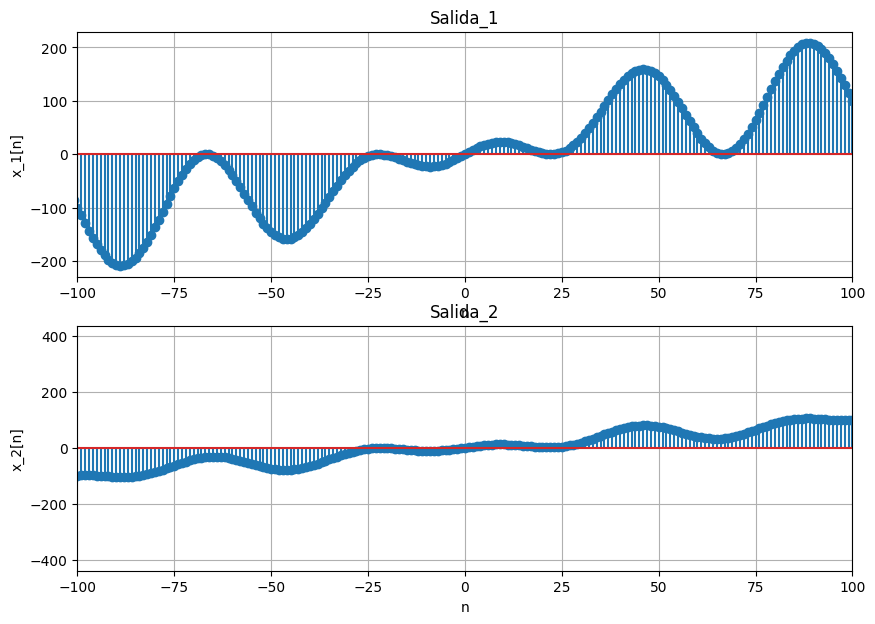

error promedio de linealidad : 2413.912154719883


In [200]:
#DEMOSTRAMOS LINEALIDAD
#dado un T { a1* x_1  +  a2*x_2} = a1* T{x_1} +  a2*T{x_2}
term_1 = sistema3(a1*x_1 + a2*x_2 , indices)[0]
term_1_idx = sistema3(a1*x_1 + a2*x_2 , indices)[1]
term_2 = a1*sistema3(x_1, indices)[0] + a2*sistema3(x_2 , indices)[0]
term_2_idx = sistema3(x_1, indices)[1]

plt.figure(figsize=(10, 7))
# Gráfico para x_1
plt.subplot(2, 1, 1)
plt.stem(term_1_idx, term_1)
plt.title('Salida_1')
plt.xlim([-100,100])
plt.xlabel('n')
plt.ylabel('x_1[n]')
plt.grid(True)

# Gráfico para x_2
plt.subplot(2, 1, 2) 
plt.stem(term_2_idx, term_2)
plt.title('Salida_2')
plt.xlabel('n')
plt.xlim([-100,100])
plt.ylabel('x_2[n]')
plt.grid(True)
plt.show()

print(f"error promedio de linealidad : {np.linalg.norm(term_1-term_2)}")

Para demostrar que un sistema es lineal , se deben aplicar la suma de dos señales escaladas y comparalas con la suma de los resultados escalados de las salidas de cada resultado independiente de solo aplicar una de las señales a la entrada del sistema. Se realizo este procedimiento de manera experiemtal , y luego de aplicar un método de comparación de los valores del arreglo que genera la gráfica , podemos determinar que el sistema no es lineal.

DEMOSTRACIÓN INVARIANZA SISTEMA 3

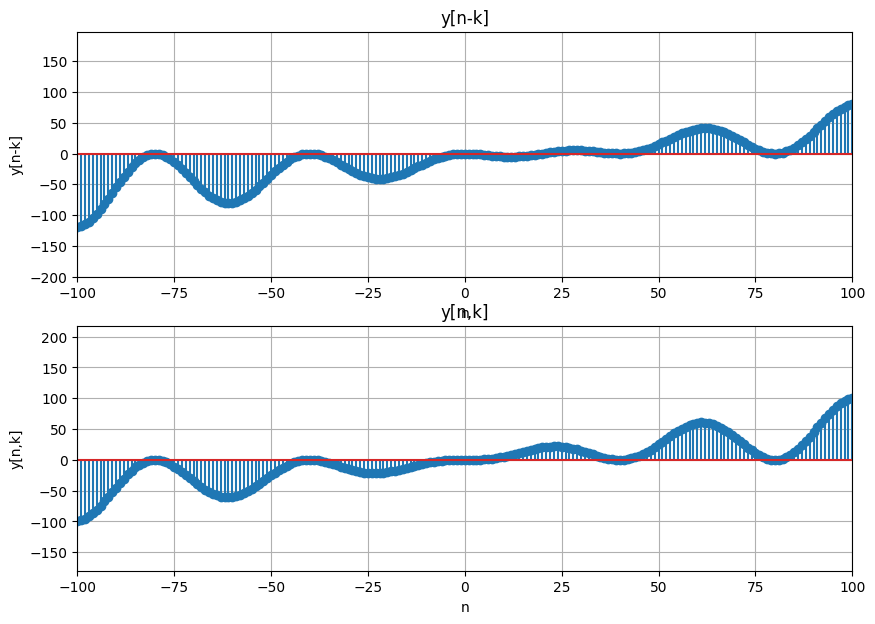

error promedio caso invarianza 244.94897427831782


In [201]:
#Demostramos invarianza en el tiempo 
#y[n-k] = y [n,k] -> es TI

#Aplicamos retraso en el tiempo a la entrada para term2
indices_prueba_2 =  indices #Hacemos una copia 


term_1 = retraso_signal(sistema3(x_1,indices)[0],sistema3(x_1,indices)[1], k )[0]
term_1_idx = retraso_signal(sistema3(x_1,indices)[0],sistema3(x_1,indices)[1], k )[1]

indices_prueba_2_2 =  indices #Hacemos una copia 

term_2 = sistema3(retraso_signal(x_1, indices_prueba_2_2, k)[0],retraso_signal(x_1, indices_prueba_2_2, k)[1])[0]
term_2_idx = sistema3(retraso_signal(x_1, indices_prueba_2_2, k)[0],retraso_signal(x_1, indices_prueba_2_2, k)[1])[1]
plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)
plt.stem(term_1_idx, term_1)
plt.title('y[n-k]')
plt.xlim([-100,100])
plt.ylim([np.min(term_1),np.max(term_1)])
plt.xlabel('n')
plt.ylabel('y[n-k]')
plt.grid(True)
plt.subplot(2, 1, 2) 
plt.stem(term_2_idx, term_2)
plt.title('y[n,k]')
plt.ylim([np.min(term_2),np.max(term_2)])
plt.xlabel('n')
plt.xlim([-100,100])
plt.ylabel('y[n,k]')
plt.grid(True)
plt.show()
print(f"error promedio caso invarianza {np.linalg.norm(term_1-term_2)}")

De manera similar al anterior sistema , realizamos las comparaciones de distintos escenarios de respuestas del sistema a distintas entradas con desfases y medimos el error (comparación de estas) . Entonces como este valor es mucho más alto que 1 , podemos afirmar que el sistema no TI . 

En conclusión el tercer sistema de esta pregunta no es Lineal ni invariante en el tiempo.

PREGUNTA 2

PREGUNTA 2
Imagine que se tiene los siguientes sistemas:
Sistema 1 (H[n]):
y1[n] = 10x[n] + 0.25x[n − 1] + 0.5y1[n − 1]
Sistema 2 (G[n]):
y2[n] = x[n] − 0.2x[n − 1] + 0.1x[n − 2] + 0.8y2[n − 1] − 0.6y2[n − 2]
Donde y[n] son las se˜nales de salida de los sistemas 1 y 2 respectivamente

a) (1pto.) Implemente un c´odigo para obtener la respuesta al impulso de G[n] y
graf´ıquelo empleando N=50 muestras.

In [202]:
#Importamos librerías
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Hineill\AppData\Local\Temp\ipykernel_46952\3834352999.py:19: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(y_n, use_line_collection=True)


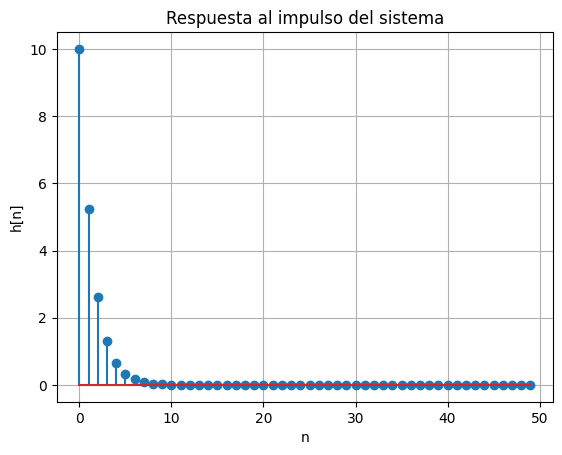

In [273]:
#ASINCRONO
#Como se menciona que el sistema está inicialmente en reposo  
#y[-1] = 0
N= 50 #Número de samples
#Para simular la respuesta al impulso 
#Asumiremos un x_n = dirac(n)
x_n = np.zeros(N)
x_n[0]= 1
#Ahora metemos todo al bucle para barrer los valores de y_n
#y[0] = 10x[0] + 0.25*x[-1] + 0.5y[-1]
#
y_n = np.zeros(N)
for i  in range(N): 
    if (i==0) :
        y_n[i]= 10*x_n[i] 
    else:
        y_n[i]= 10*x_n[i] + 0.25*x_n[i-1] + 0.5*y_n[i-1]
# Graficar y_n
plt.stem(y_n, use_line_collection=True)
plt.title('Respuesta al impulso del sistema')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.grid(True)
plt.show()
h_n=y_n #Respuesta al impulso

CÁLCULO G[n]

C:\Users\Hineill\AppData\Local\Temp\ipykernel_46952\2689529219.py:17: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(y_n_2, use_line_collection=True)


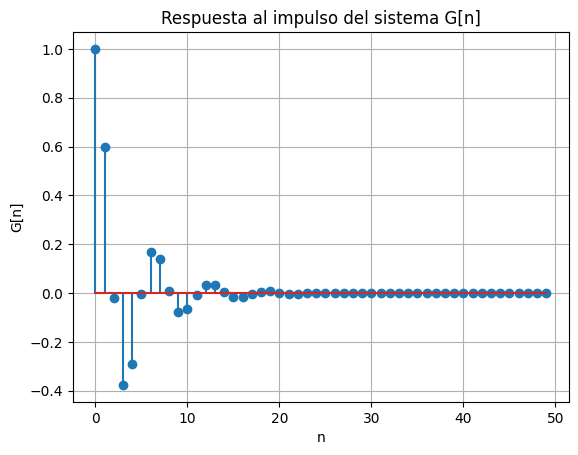

In [283]:
#Como se menciona que el sistema está inicialmente en reposo  
#y[0] = 0
N= 50 #Número de samples
#Para simular la respuesta al impulso 
#Asumiremos un x_n = dirac(n)
#y[-1]= 0 por el reposo
x_n = np.zeros(N)
x_n[0]= 1
#Ahora metemos todo al bucle para barrer los valores de y_n
y_n_2 = np.zeros(N)
for i  in range(N): 
    if (i==0) :
        y_n_2[i]= x_n[i]
    else:
        y_n_2[i]= x_n[i] - 0.2*x_n[i-1] + 0.1*x_n[i-2]   + 0.8*y_n_2[i-1] -0.6 *y_n_2[i-2]
# Graficar y_n
plt.stem(y_n_2, use_line_collection=True)
plt.title('Respuesta al impulso del sistema G[n]')
plt.xlabel('n')
plt.ylabel('G[n]')
plt.grid(True)
plt.show()
g_n=y_n_2

De igual forma que en el lab asincrono se calculo la respuesta al impulso asumiendo una entrada de delta de kronecker y replicando la acción del sistema. Asumí la misma condición que se dio en la sección asincrona de considerar un sistema en reposo.

b) (1pto.)Implemente un c´odigo para demostrar la linearidad e invarianza en el
tiempo de H[n].

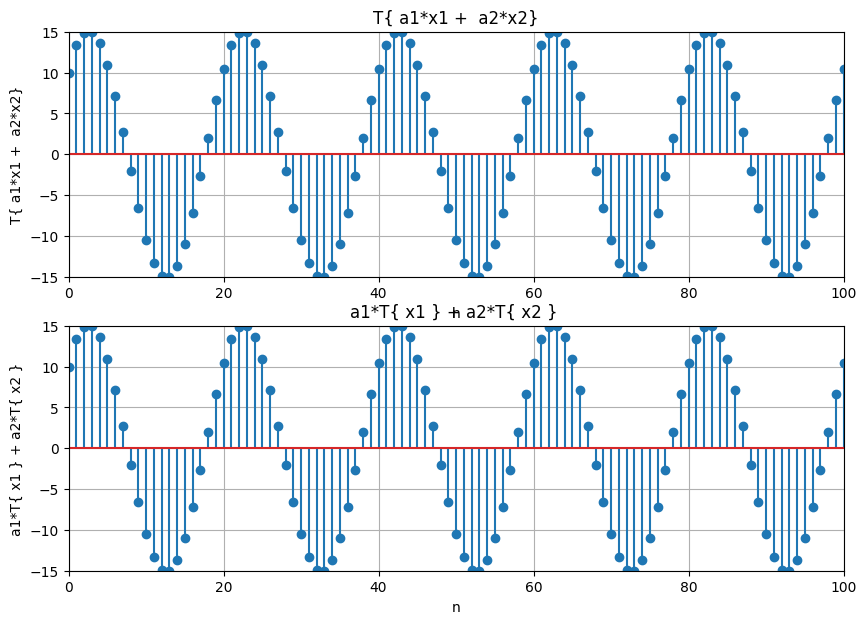

error promedio caso linealidad 8.106665767237443e-14


In [284]:
#parametros para determinar la linealidad 
a1 =1 
a2 =1
k = 20 #delay 
N=4000
n = np.arange(N)
#PRUEBAS 
x1 = np.sin(0.1 * np.pi * n)  
x2 = np.cos(0.1 * np.pi * n) #cambiar 

#Linealidad 
def sistema_H(input , indices):
    y_n = np.zeros(len(indices))
    for i  in range(len(indices)): 
        if (i==0) :
            y_n[i]= 10*input[i] 
        else:
            y_n[i]= 10*input[i] + 0.25*input[i-1] + 0.5*input[i-1]
    nuevo_indices =  np.arange(indices[0] , indices[0]  +  len(y_n) )
    return [y_n , nuevo_indices]  


#PROBAMOS LINEALIDAD 

term_1 =  a1*sistema_H(x1,n)[0] + a2 * sistema_H(x2,n)[0]
term_1_idx =  sistema_H(x1,n)[1]

term_2 =  sistema_H(a1*x1 + a2*x2 ,n)[0]
term_2_idx =  sistema_H(a1*x1 + a2*x2 ,n )[1]

plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)
plt.stem(term_1_idx, term_1)
plt.title('T{ a1*x1 +  a2*x2}')
plt.ylim([np.min(term_1),np.max(term_1)])
plt.xlim([np.min(term_1_idx),np.min(term_1_idx) +  100])
plt.xlabel('n')
plt.ylabel('T{ a1*x1 +  a2*x2}')
plt.grid(True)

plt.subplot(2, 1, 2) 
plt.title('a1*T{ x1 } + a2*T{ x2 } ')
plt.stem(term_2_idx, term_2)
plt.ylim([np.min(term_2),np.max(term_2)])
plt.xlim([np.min(term_2_idx),np.min(term_2_idx) +  100 ])
plt.xlabel('n')
plt.ylabel('a1*T{ x1 } + a2*T{ x2 }')
plt.grid(True)
plt.show()
print(f"error promedio caso linealidad {np.linalg.norm(term_1-term_2)}")

De la misma forma en como se valido en la anterior pregunta , comparamos los resultados de ambos escenarios , como obtenemos un error bastante bajo , podemos asumir que son iguales . Por lo tanto, el sistema es LINEAL.

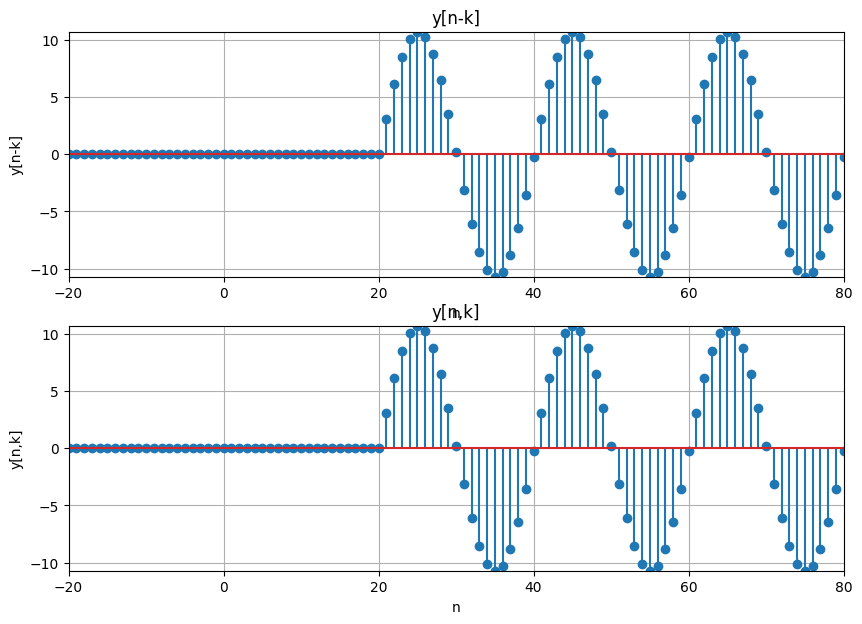

error promedio caso invarianza 0.0


In [285]:
def retraso_signal(signal , indices, delay):
    signal_delay = np.roll(np.pad(signal,(delay,delay), mode="constant" ,constant_values=0) ,  delay ) 
    idx= np.arange(np.min(indices) - delay ,  np.max(indices) + delay+1)
    return [signal_delay , idx]


#x1 = np.sin(0.1 * np.pi * n)  

#PROBAMOOS INVARIRANZA
term_1 =  sistema_H(retraso_signal(x1 ,n ,k )[0], retraso_signal(x1 ,n ,k )[1] )[0]
term_1_idx =  sistema_H(retraso_signal(x1 ,n ,k  )[0], retraso_signal(x1,n ,k )[1] )[1] 

term_2 =  retraso_signal(sistema_H(x1, n)[0] , sistema_H(x1, n)[1],k)[0]
term_2_idx =  retraso_signal(sistema_H(x1, n)[0] , sistema_H(x1, n)[1],k)[1]
plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)
plt.stem(term_1_idx, term_1)
plt.title('y[n-k]')
plt.ylim([np.min(term_1),np.max(term_1)])
plt.xlim([np.min(term_1_idx),np.min(term_1_idx) +  100])
plt.xlabel('n')
plt.ylabel('y[n-k]')
plt.grid(True)

plt.subplot(2, 1, 2) 
plt.title('y[n,k]')
plt.stem(term_2_idx, term_2)
plt.ylim([np.min(term_2),np.max(term_2)])
plt.xlim([np.min(term_2_idx),np.min(term_2_idx) +  100 ])
plt.xlabel('n')
plt.ylabel('y[n,k]')
plt.grid(True)
plt.show()
print(f"error promedio caso invarianza {np.linalg.norm(term_1-term_2)}")

De acuerdo a los gráficos obtenidos podemos observar como un delay en la entrada tiene el mismo efecto de retardo a la salida , además esto se puede confirmar después calculando la norma de la resta de ambos vectores ; entonces obtenemos un error de 0 por lo tanto ambos arreglos y gráficas son exactamente iguales . Por lo tanto el sistema es TI.

En conclusión el sistema H[n] es LINEAL e INVARIANTE en el tiempo. 

c) (1pto.)Implemente el c´odigo para demostrar la linearidad e invarianza en el tiempo
de G[n].

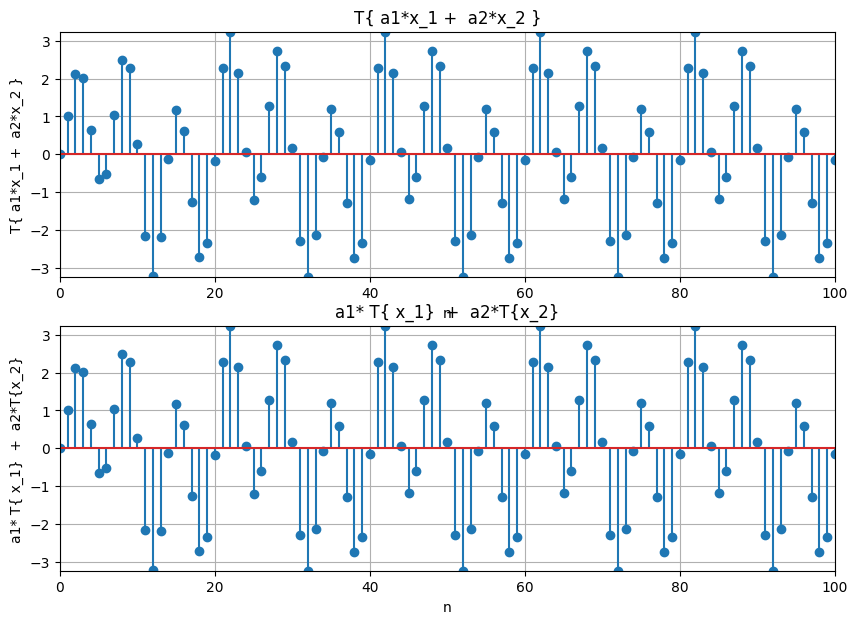

error promedio caso Linealidad 2.5664889049203014e-14


In [294]:
a1 =1 
a2 =1
k = 20 #delay 
N=4000
n = np.arange(N)
#PRUEBAS 
x1 = np.sin(0.3 * np.pi * n)  
x2 = np.sin(0.1 * np.pi * n)  

def sistema_g_n(input , indices):
    output = np.zeros(len(indices))
    for i  in range(len(indices)): 
        if (i==0) :
            output[i]= input[i]
        else:
            output[i]= input[i] - 0.2*input[i-1] + 0.1*input[i-2]   + 0.8*output[i-1] -0.6 *output[i-2]
    nuevo_indices =  np.arange(indices[0] , indices[0]  +  len(output))
    return [output , nuevo_indices ]

#PROBAMOS LINEALIDAD 
term_1 =  a1*sistema_g_n(x1,n)[0] + a2 * sistema_g_n(x2,n)[0]
term_1_idx =  sistema_g_n(x1,n)[1]

term_2 =  sistema_g_n(a1*x1 + a2*x2 ,n)[0]
term_2_idx =  sistema_g_n(a1*x1 + a2*x2 ,n )[1]

plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)
plt.stem(term_1_idx, term_1)
plt.title('T{ a1*x_1 +  a2*x_2 }')
plt.ylim([np.min(term_1),np.max(term_1)])
plt.xlim([np.min(term_1_idx),np.min(term_1_idx) +  100])
plt.xlabel('n')
plt.ylabel('T{ a1*x_1 +  a2*x_2 }')
plt.grid(True)

plt.subplot(2, 1, 2) 
plt.title('a1* T{ x_1}  +  a2*T{x_2}')
plt.stem(term_2_idx, term_2)
plt.ylim([np.min(term_2),np.max(term_2)])
plt.xlim([np.min(term_2_idx),np.min(term_2_idx) +  100 ])
plt.xlabel('n')
plt.ylabel('a1* T{ x_1}  +  a2*T{x_2}')
plt.grid(True)
plt.show()
print(f"error promedio caso Linealidad {np.linalg.norm(term_1-term_2)}")


Similarmente , realizamos la cálculos de los efectos distintos , como se hizo en el anterior inciso . Entonces ,como tenemos un error bastante bajo podemos afirmar que las dos señales resultantes son iguales (similares) , por lo tanto el sistema es LINEAL. 

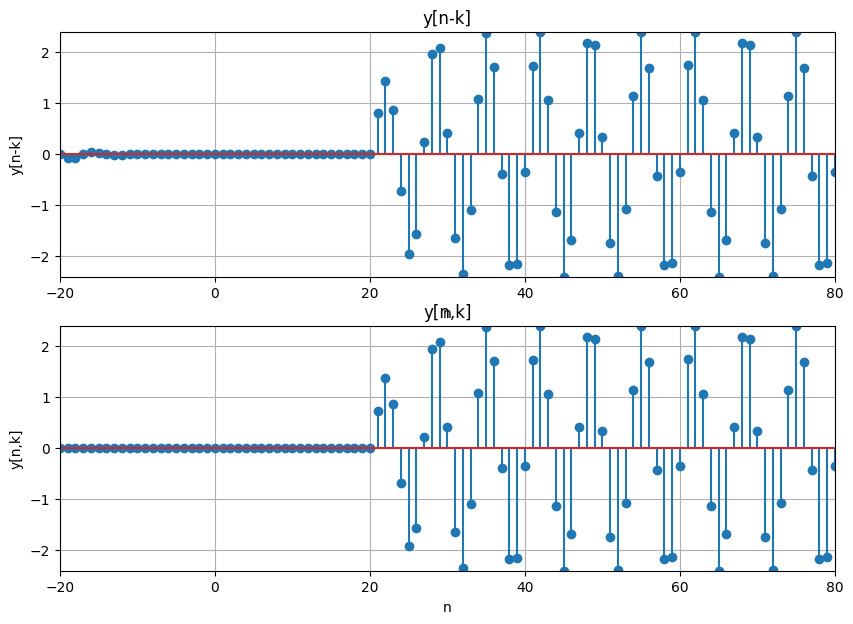

error promedio caso invarianza 0.1651429272559614


In [295]:
#PROBAMOOS INVARIRANZA

#PREGUNTARRRR

#PROBAMOS USANDO UN IMPULSO
#x1= np.zeros(N)
#x1[0] = 1 

#PROBAMOS USANDO UNA FUNCIÓN CON ALTA FRECUENCIA 
#x1 =  np.sin(0.01 * np.pi *  (np.arange(N)))

term_1 =  sistema_g_n(retraso_signal(x1 ,n ,k )[0], retraso_signal(x1 ,n ,k )[1] )[0]
term_1_idx =  sistema_g_n(retraso_signal(x1 ,n ,k  )[0], retraso_signal(x1,n ,k )[1] )[1] 

term_2 =  retraso_signal(sistema_g_n(x1, n)[0] , sistema_g_n(x1, n)[1],k)[0]
term_2_idx =  retraso_signal(sistema_g_n(x1, n)[0] , sistema_g_n(x1, n)[1],k)[1]

plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)
plt.stem(term_1_idx, term_1)
plt.title('y[n-k]')
plt.ylim([np.min(term_1),np.max(term_1)])
plt.xlim([np.min(term_1_idx),np.min(term_1_idx) +  100])
plt.xlabel('n')
plt.ylabel('y[n-k]')
plt.grid(True)

plt.subplot(2, 1, 2) 
plt.title('y[n,k]')
plt.stem(term_2_idx, term_2)
plt.ylim([np.min(term_2),np.max(term_2)])
plt.xlim([np.min(term_2_idx),np.min(term_2_idx) +  100 ])
plt.xlabel('n')
plt.ylabel('y[n,k]')
plt.grid(True)
plt.show()
print(f"error promedio caso invarianza {np.linalg.norm(term_1-term_2)}")

Es INVARIANTE O NO ? el error debe ser más pequeño ??

d)(1pto.) Implemente un programa para calcular la respuesta al impulso del siguiente
sistema (H[n] * G[n]) y graf´ıquelo usando N=50 muestras.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


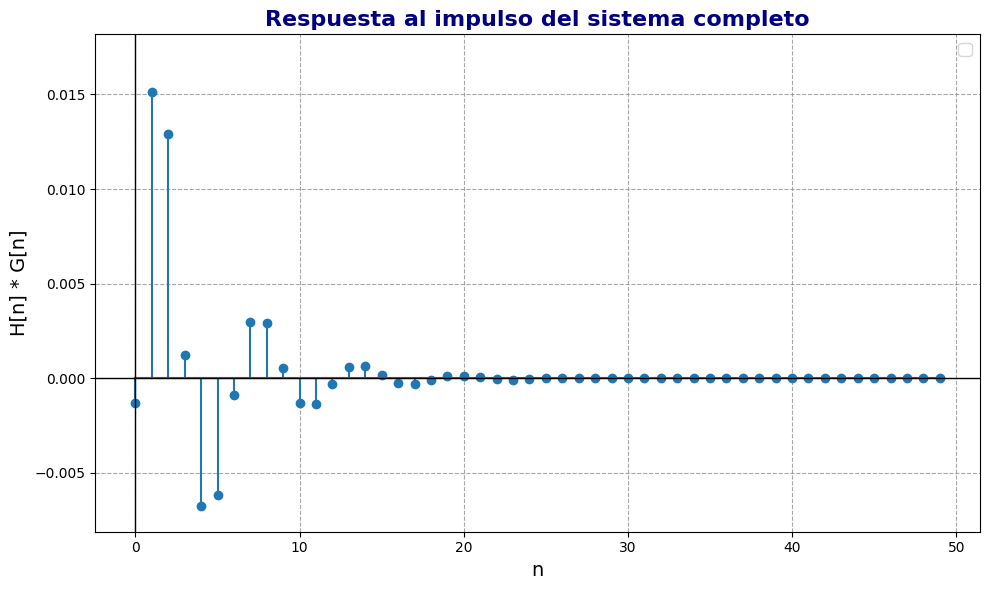

In [296]:
#sistema_g_n
#sistema_H
g_n , h_n
respuesta_final = np.convolve(g_n ,h_n , "same")

plt.figure(figsize=(10, 6), dpi=100)  
plt.stem(np.arange(len(respuesta_final)), respuesta_final)
plt.title("Respuesta al impulso del sistema completo", fontsize=16, fontweight='bold', color='navy')
plt.xlabel("n", fontsize=14)
plt.ylabel("H[n] * G[n]", fontsize=14)
plt.grid(True, which='both', linestyle='--', color='gray', alpha=0.7) 
plt.axhline(0, color='black',linewidth=1)  
plt.axvline(0, color='black',linewidth=1)  
plt.ylim(np.min(respuesta_final) * 1.2, np.max(respuesta_final) * 1.2)
plt.legend(loc="upper right", fontsize=12)
plt.tight_layout()
plt.show()

La respuesta al impulso de todo ell sistema es igual a la convolución de la respuesta al impulso de cada uno de los componentes de este sistema más grande. Se calculo meidante el metodo convolve y se ploteo. 

e) (1pto.)Implemente el c´odigo para demostrar la linearidad e invarianza en el tiempo
de H[n] * G[n].

PROBAMOS LINEALIDAD DEL SISTEMA FINAL

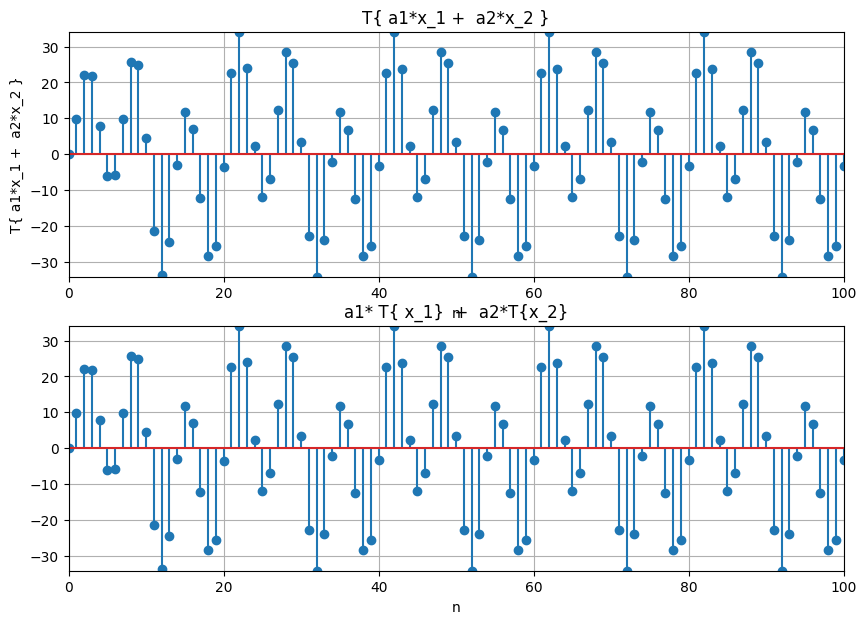

error promedio caso Lineal 2.9433970179877605e-13


In [309]:
def sistema_respuesta_final (input,  indices): 
    return [sistema_g_n(sistema_H(input ,indices)[0] ,  sistema_H(input ,indices)[1])[0] , sistema_g_n(sistema_H(input ,indices)[0] ,  sistema_H(input ,indices)[1])[1] ]

a1 =1 
a2 =1
k = 20 #delay 
N=4000
n = np.arange(N)
#PRUEBAS 
x1 = np.sin(0.3 * np.pi * n)  
x2 = np.sin(0.1 * np.pi * n)  

#PROBAMOS LINEALIDAD 
term_1 =  a1*sistema_respuesta_final(x1,n)[0] + a2 * sistema_respuesta_final(x2,n)[0]
term_1_idx =  sistema_respuesta_final(x1,n)[1]

term_2 =  sistema_respuesta_final(a1*x1 + a2*x2 ,n)[0]
term_2_idx =  sistema_respuesta_final(a1*x1 + a2*x2 ,n )[1]

plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)
plt.stem(term_1_idx, term_1)
plt.title('T{ a1*x_1 +  a2*x_2 }')
plt.ylim([np.min(term_1),np.max(term_1)])
plt.xlim([np.min(term_1_idx),np.min(term_1_idx) +  100])
plt.xlabel('n')
plt.ylabel('T{ a1*x_1 +  a2*x_2 }')
plt.grid(True)


plt.subplot(2, 1, 2) 
plt.title('a1* T{ x_1}  +  a2*T{x_2}')
plt.stem(term_2_idx, term_2)
plt.ylim([np.min(term_2),np.max(term_2)])
plt.xlim([np.min(term_2_idx),np.min(term_2_idx) +  100 ])
plt.xlabel('n')
plt.title('a1* T{ x_1}  +  a2*T{x_2}')
plt.grid(True)
plt.show()
print(f"error promedio caso Lineal {np.linalg.norm(term_1-term_2)}")

Las gráficas de ambos resutados de operar se diferencian por muy poco , error casi nulo , Por lo tanto el se puede afirmar que el sistema es LINEAL

PROBAMOS INVARIANZA DEL SISTEMA TOTAL 

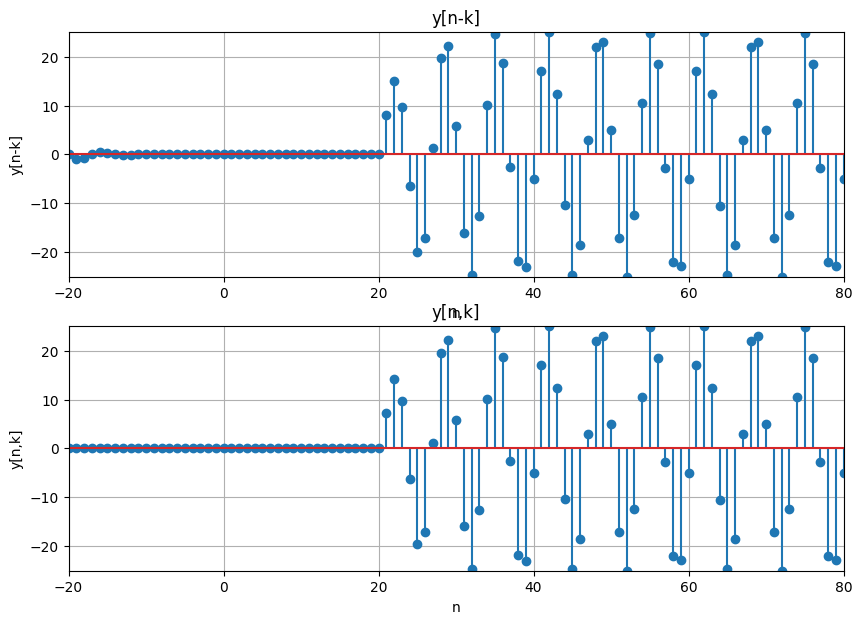

error promedio caso invarianza 1.7970321383018089


In [310]:
#PROBAMOOS INVARIRANZA
#PREGUNTARRRR

#PROBAMOS USANDO UN IMPULSO
#x1= np.zeros(N)
#x1[0] = 1 

#PROBAMOS USANDO UNA FUNCIÓN CON ALTA FRECUENCIA 
#x1 =  np.sin(3* np.pi *  (np.arange(N)))

term_1 =  sistema_respuesta_final(retraso_signal(x1 ,n ,k )[0], retraso_signal(x1 ,n ,k )[1] )[0]
term_1_idx =  sistema_respuesta_final(retraso_signal(x1 ,n ,k  )[0], retraso_signal(x1,n ,k )[1] )[1] 

term_2 =  retraso_signal(sistema_respuesta_final(x1, n)[0] , sistema_respuesta_final(x1, n)[1],k)[0]
term_2_idx =  retraso_signal(sistema_respuesta_final(x1, n)[0] , sistema_respuesta_final(x1, n)[1],k)[1]

plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)
plt.stem(term_1_idx, term_1)
plt.title('y[n-k]')
plt.ylim([np.min(term_1),np.max(term_1)])
plt.xlim([np.min(term_1_idx),np.min(term_1_idx) +  100])
plt.xlabel('n')
plt.ylabel('y[n-k]')
plt.grid(True)

plt.subplot(2, 1, 2) 
plt.title('y[n,k]')
plt.stem(term_2_idx, term_2)
plt.ylim([np.min(term_2),np.max(term_2)])
plt.xlim([np.min(term_2_idx),np.min(term_2_idx) +  100 ])
plt.xlabel('n')
plt.ylabel('y[n,k]')
plt.grid(True)
plt.show()
print(f"error promedio caso invarianza {np.linalg.norm(term_1-term_2)}")



ERROR MUY ALTO  ?  SE CONSIDERA INVARIANTE ?  O NO ?

PREGUNTA 3

Teniendo en cuenta que la correlaci´on de dos se˜nales discretas est´a representada
como:
rxy[n] =
P∞
k=−∞ x[k]y[k − n]
Cree las siguientes se˜nales usando N=16000 muestras.
x1[n] = sin(2.π. 147
16000.n) + sin(2.π. 294
16000.n)
x2[n] = sin(2.π. 131
16000.n) + sin(2.π. 262
16000.n)

a) (1pto.) Aplique la correlaci´on de cada se˜nal x1[n] y x2[n] contra la se˜nal de audio
(chord.wav, tomar como valores a partir de t=1.1s) usando convoluci´on. Luego
obtenga el valor m´aximo y mu´estrelo.

In [362]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
N=16000
# Cargar el archivo .wav
fs, data = wavfile.read('chord.wav') 

In [363]:
#Generamos las señales 
n = np.arange(N)
n = n *(1/fs)
x_1 =  np.sin(2*np.pi*(147/16000)*n) + np.sin(2*np.pi*(294/16000)*n)
x_2 =  np.sin(2*np.pi*(131/16000)*n) + np.sin(2*np.pi*(262/16000)*n)

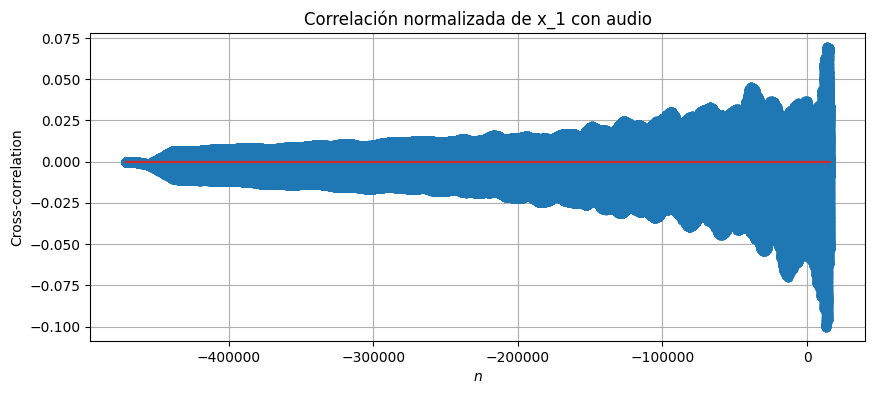

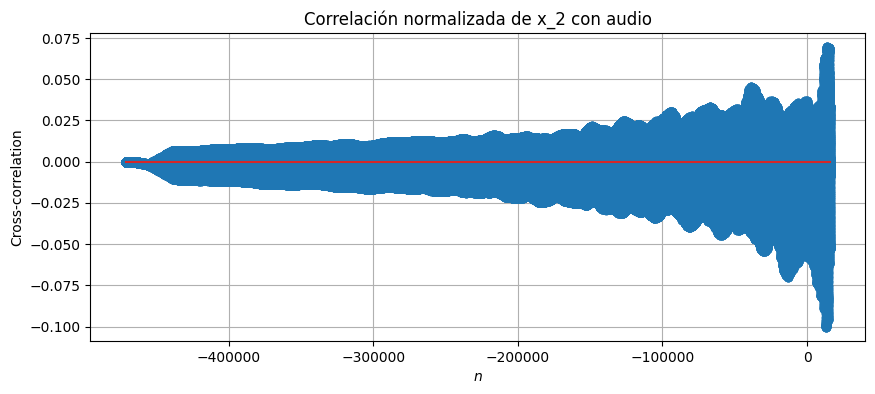

In [367]:
num  = int(1.1 * fs)
y_n = data[num:]
r1 = np.correlate(x_1,y_n,mode='full')
r2 = np.correlate(x_2,y_n,mode='full')
idx = np.arange(-len(y_n),-len(y_n) + len(r1))

p_y = np.sum(y_n**2)
p_1 = np.sum(x_1**2)
p_2 = np.sum(x_2**2)

fig, ax = plt.subplots(figsize=[10,4])
ax.stem(idx,r1/np.sqrt(p_1*p_y))
ax.set_title("Correlación normalizada de x_1 con audio")
ax.set_xlabel('$n$')
ax.set_ylabel('Cross-correlation')
ax.grid()

fig, ax = plt.subplots(figsize=[10,4])
ax.set_title("Correlación normalizada de x_2 con audio")
ax.stem(idx,r2/np.sqrt(p_2*p_y))
ax.set_xlabel('$n$')
ax.set_ylabel('Cross-correlation')
ax.grid()

In [373]:
print("--------------------CORRELACIONES NORMALIZADAS------------")
print(f"Valor máximo de la correlación  x_1 y audio : { np.max(r1)/np.sqrt(p_1*p_y)}")
print(f"Valor máximo de la correlación x_2 y audio : { np.max(r2)/np.sqrt(p_2*p_y)}")
print("--------------------CORRELACIONES SIN NORMALIZAR------------")
print(f"Valor máximo de la correlación  x_1 y audio : { np.max(r1)}")
print(f"Valor máximo de la correlación x_2 y audio : { np.max(r2)}")
print("--------------------Promedio CORRELACIONES SIN NORMALIZAR------------")
print(f"Valor máximo de la correlación  x_1 y audio : { np.linalg.norm(r1)}")
print(f"Valor máximo de la correlación x_2 y audio : { np.linalg.norm(r2)}")
print("--------------------Promedio CORRELACIONES NORMALIZADAS------------")
print(f"Valor máximo de la correlación  x_1 y audio : { np.linalg.norm(r1)/np.sqrt(p_1*p_y)}")
print(f"Valor máximo de la correlación x_2 y audio : { np.linalg.norm(r2)/np.sqrt(p_2*p_y) }")

--------------------CORRELACIONES NORMALIZADAS------------
Valor máximo de la correlación  x_1 y audio : 0.06964793884902241
Valor máximo de la correlación x_2 y audio : 0.06964922528827534
--------------------CORRELACIONES SIN NORMALIZAR------------
Valor máximo de la correlación  x_1 y audio : 9826.68292354319
Valor máximo de la correlación x_2 y audio : 8757.510941284876
--------------------Promedio CORRELACIONES SIN NORMALIZAR------------
Valor máximo de la correlación  x_1 y audio : 1284475.7254161527
Valor máximo de la correlación x_2 y audio : 1144716.852526996
--------------------Promedio CORRELACIONES NORMALIZADAS------------
Valor máximo de la correlación  x_1 y audio : 9.103894719397447
Valor máximo de la correlación x_2 y audio : 9.10402995639771


Text(0, 0.5, 'Cross-correlation')

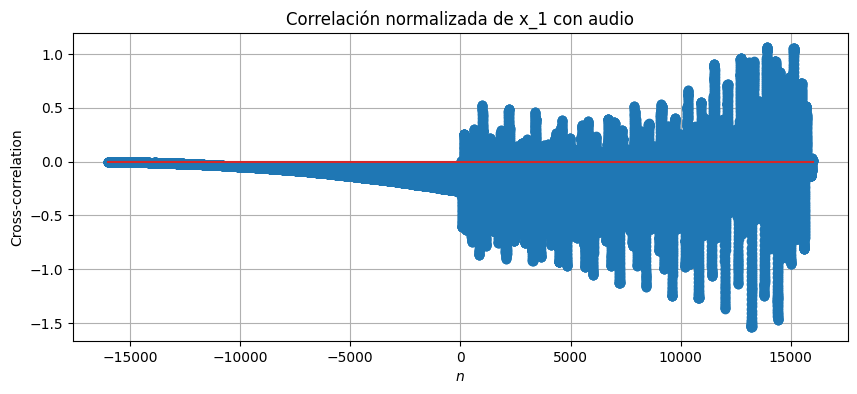

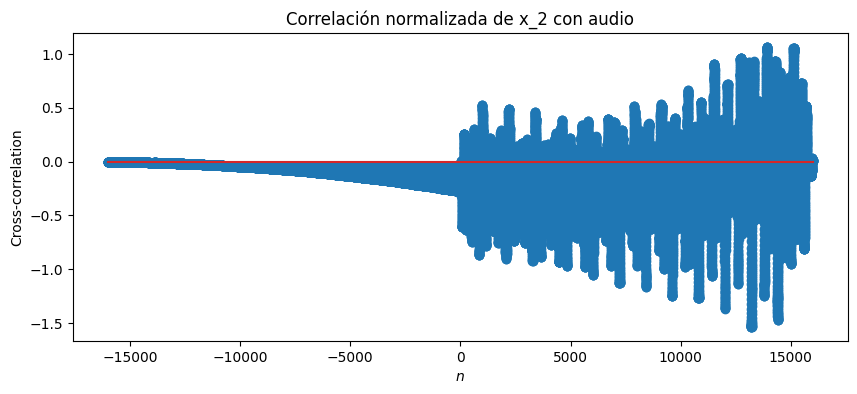

In [374]:
#SI PUDIERAMOS LIMITAR LAS MUESTRAS 
num  = int(1.1 * fs)
y_n = data[num:num+N]
r1 = np.correlate(x_1,y_n,mode='full')
r2 = np.correlate(x_2,y_n,mode='full')
idx = np.arange(-len(y_n),-len(y_n) + len(r1))

p_y = np.sum(y_n**2)
p_1 = np.sum(x_1**2)
p_2 = np.sum(x_2**2)

fig, ax = plt.subplots(figsize=[10,4])
ax.stem(idx,r1/np.sqrt(p_1*p_y))
ax.set_title("Correlación normalizada de x_1 con audio")
ax.set_xlabel('$n$')
ax.set_ylabel('Cross-correlation')
ax.grid()

fig, ax = plt.subplots(figsize=[10,4])
ax.set_title("Correlación normalizada de x_2 con audio")
ax.stem(idx,r2/np.sqrt(p_2*p_y))
ax.set_xlabel('$n$')
ax.set_ylabel('Cross-correlation')
ax.grid()


In [376]:
print("--------------------CORRELACIONES NORMALIZADAS------------")
print(f"Valor máximo de la correlación  x_1 y audio : { np.max(r1)/np.sqrt(p_1*p_y)}")
print(f"Valor máximo de la correlación x_2 y audio : { np.max(r2)/np.sqrt(p_2*p_y)}")
print("--------------------CORRELACIONES SIN NORMALIZAR------------")
print(f"Valor máximo de la correlación  x_1 y audio : { np.max(r1)}")
print(f"Valor máximo de la correlación x_2 y audio : { np.max(r2)}")
print("--------------------Promedio CORRELACIONES------------")
print(f"Valor máximo de la correlación  x_1 y audio : { np.linalg.norm(r1)}")
print(f"Valor máximo de la correlación x_2 y audio : { np.linalg.norm(r2)}")

--------------------CORRELACIONES NORMALIZADAS------------
Valor máximo de la correlación  x_1 y audio : 1.067068765838967
Valor máximo de la correlación x_2 y audio : 1.0670884752398286
--------------------CORRELACIONES SIN NORMALIZAR------------
Valor máximo de la correlación  x_1 y audio : 9826.68292354319
Valor máximo de la correlación x_2 y audio : 8757.510941284876
--------------------Promedio CORRELACIONES------------
Valor máximo de la correlación  x_1 y audio : 545509.5034582709
Valor máximo de la correlación x_2 y audio : 486153.79552644776


b)(1pto.) Acorde a los resultados obtenidos qu´e se˜nal es m´as similar al archivo de
audio. Recordar que a mayor valor de correlaci´on m´as similaridad se obtiene.

La segunda correlación tiene mayor valor por tanto es más parecida. 

c)(1pto.) Realice la convoluci´on de ambas se˜nales X1 y X2 usando FFT. Luego
muestre si esta se˜nal obtenida tiene mayor similitud con la se˜nal de audio.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


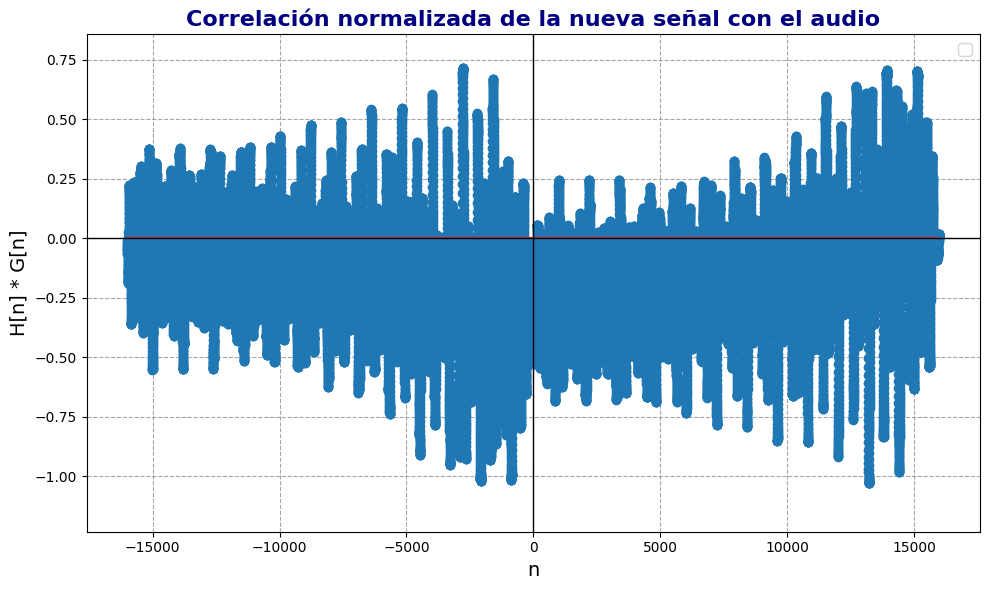

In [397]:
x_1_fft = np.fft.fft(np.fft.fftshift(x_1))
x_2_fft = np.fft.fft((x_2))

x_result_fft = x_1_fft *  x_2_fft
x_result = np.fft.ifft((x_result_fft))

p_result =  np.sum(x_result**2)
p_y = np.sum(y_n ** 2)
nueva_final  =  np.correlate(x_result , y_n , mode="full")
idx = np.arange(-len(y_n),-len(y_n) + len(nueva_final)  )

plt.figure(figsize=(10, 6), dpi=100)  
plt.stem(idx, nueva_final / np.sqrt(p_y * p_result))
plt.title("Correlación normalizada de la nueva señal con el audio", fontsize=16, fontweight='bold', color='navy')
plt.xlabel("n", fontsize=14)
plt.ylabel("H[n] * G[n]", fontsize=14)
plt.grid(True, which='both', linestyle='--', color='gray', alpha=0.7) 
plt.axhline(0, color='black',linewidth=1)  
plt.axvline(0, color='black',linewidth=1)  
plt.ylim(np.min(nueva_final / np.sqrt(p_y * p_result)) * 1.2, np.max(nueva_final / np.sqrt(p_y * p_result)) * 1.2)
plt.legend(loc="upper right", fontsize=12)
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


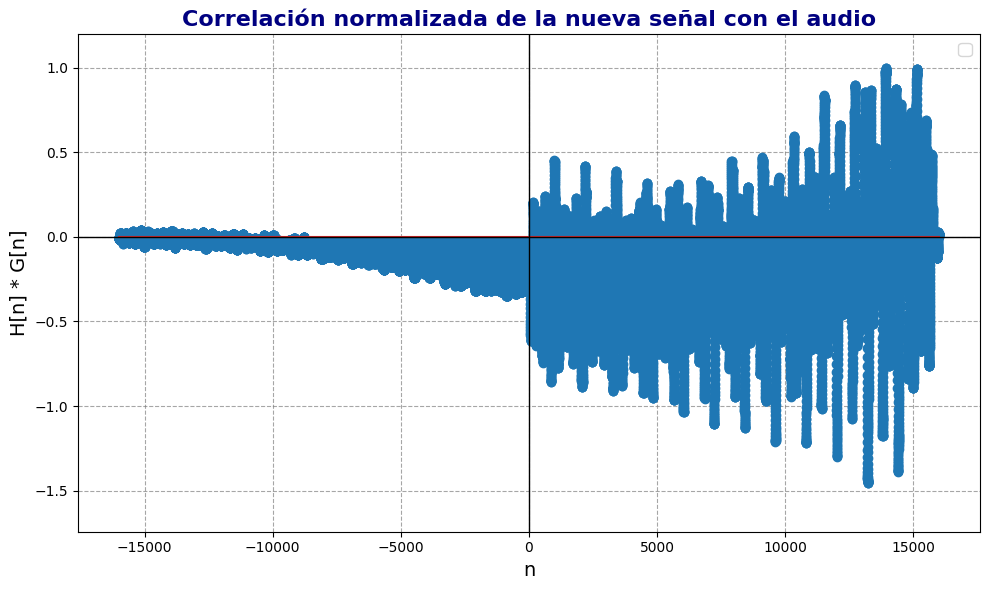

In [392]:
#Usando convolución 
resultado =  np.convolve(x_1 , x_2 , mode="same")
nueva_final  =  np.correlate(resultado , y_n , mode="full")
idx = np.arange(-len(y_n),-len(y_n) + len(nueva_final)  )
p_y= np.sum(resultado ** 2 )
plt.figure(figsize=(10, 6), dpi=100)  
plt.stem(idx, nueva_final / np.sqrt(p_y * p_result))
plt.title("Correlación normalizada de la nueva señal con el audio", fontsize=16, fontweight='bold', color='navy')
plt.xlabel("n", fontsize=14)
plt.ylabel("H[n] * G[n]", fontsize=14)
plt.grid(True, which='both', linestyle='--', color='gray', alpha=0.7) 
plt.axhline(0, color='black',linewidth=1)  
plt.axvline(0, color='black',linewidth=1)  
plt.ylim(np.min(nueva_final / np.sqrt(p_y * p_result)) * 1.2, np.max(nueva_final / np.sqrt(p_y * p_result)) * 1.2)
plt.legend(loc="upper right", fontsize=12)
plt.tight_layout()
plt.show()